In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_36047_I')

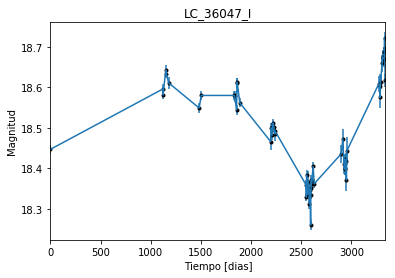

In [2]:
data = np.genfromtxt('LC_36047_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_36047_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

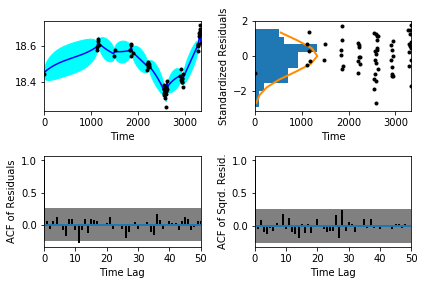

In [5]:
sample.assess_fit()

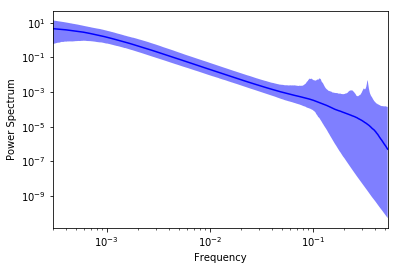

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_36047_I')

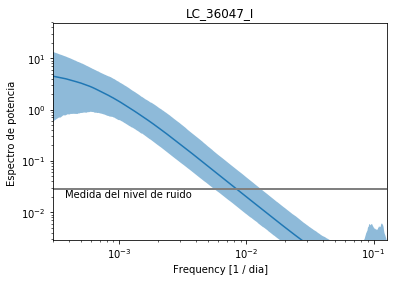

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_36047_I')

Text(0.5,1,'Prediccion , valor esperado LC_36047_I')

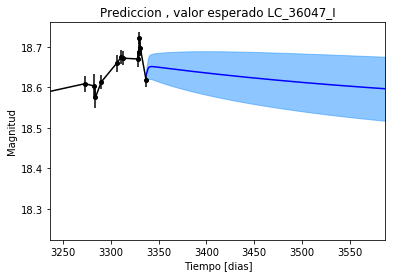

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_36047_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_36047_I')

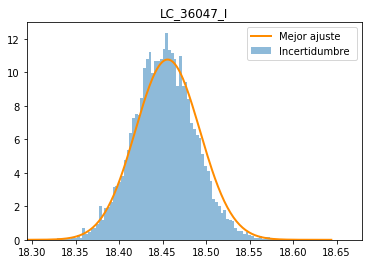

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_36047_I')

Text(0.5,1,'Interpolacion, camino simulado LC_36047_I')

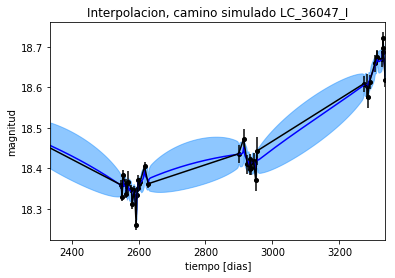

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_36047_I')

Text(0.5,1,'Interpolacion, camino simulado LC_36047_I')

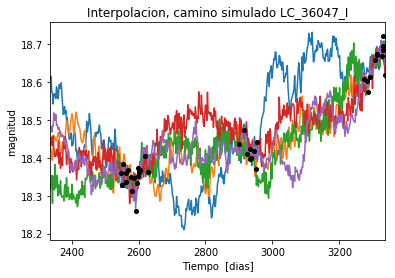

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_36047_I')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 297.515082381
Median: 0.0149346865168
Standard deviation: 0.164655800929
68% credibility interval: [ 0.00472437  0.07385483]
95% credibility interval: [ 0.00107773  0.70278194]
99% credibility interval: [  5.39126841e-04   9.81857887e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 143.640184429
Median: 0.014140156414
Standard deviation: 0.112971308654
68% credibility interval: [ 0.00425461  0.06001591]
95% credibility interval: [ 0.00072372  0.37737928]
99% credibility interval: [  3.39972188e-04   8.52032521e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 225.636908603
Median: 0.298864950702
Standard deviation: 0.2

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 867.792360355
Median: 137.818424572
Standard deviation: 2.19714193957
68% credibility interval: [ 135.34640334  139.58921798]
95% credibility interval: [ 132.42129869  141.00816632]
99% credibility interval: [ 130.40948061  141.60337765]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 341.000784102
Median: 2.40871800881
Standard deviation: 2.56607068875
68% credibility interval: [ 0.57388722  5.55000458]
95% credibility interval: [ 0.1452509   9.62282869]
99% credibility interval: [  0.08334901  13.37927564]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 297.933664558
Median: 4.21856397584
Standard deviation: 13.5396250441
68% credibility interval: [  0.7316707   18.94053241]
95% credibility interval: [  0.34249357 

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2806.65861057
Median: 4.03077296096e-15
Standard deviation: 1.60499975936e+130
68% credibility interval: [  1.81067887e-45   8.38207773e+00]
95% credibility interval: [  1.89426350e-115   2.62844082e+127]
99% credibility interval: [  1.76653051e-116   1.16310018e+131]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1360.95375857
Median: 18.5183571486
Standard deviation: 0.0462866858407
68% credibility interval: [ 18.4767618   18.56014098]
95% credibility interval: [ 18.42857635  18.61606865]
99% credibility interval: [ 18.37843897  18.6501578 ]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 120.782067317
Median: 0.252774505348
Standard deviation: 0.257703368684
68% credibility interval: [ 0.10047168  0.66281329]
95% credibility interval: [ 0.          0.93019254]
99% credibility interval: [ 0.          1.04041425]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 120.782067317
Median: 0.252774505348
Standard deviation: 0.257703368684
68% credibility interval: [ 0.10047168  0.66281329]
95% credibility interval: [ 0.          0.93019254]
99% credibility interval: [ 0.          1.04041425]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 688.333081235
Median: 0.0
Standard deviation: 0.000307929123389
68% cred

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 867.792360355
Median: 137.818424572
Standard deviation: 2.19714193957
68% credibility interval: [ 135.34640334  139.58921798]
95% credibility interval: [ 132.42129869  141.00816632]
99% credibility interval: [ 130.40948061  141.60337765]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 634.823314005
Median: 0.0108169797322
Standard deviation: 0.00561328974291
68% credibility interval: [ 0.00726177  0.01677554]
95% credibility interval: [ 0.00517158  0.02643421]
99% credibility interval: [ 0.00420332  0.03631646]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 919.246629854
Median: 1.09758575585
Standard deviation: 0.246595543344
68% credibility interval: [ 0.88776067  1.37931036]
95% credibility interval: [ 0.72842483  1.69202022]
99% credibility interval: [ 0.65238209  1.90561164]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 301.922764834
Median: 0.0305414592448
Standard deviation: 0.336712506059
68% credibility interval: [ 0.00100442  0.32069545]
95% credibility interval: [  1.10305784e-128   1.22795413e+000]
99% credibility interval: [  1.76243657e-133   1.77780738e+000]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 297.515082381
Median: (-0.09383740289-0.682162360955j)
Standard deviation: 1.92148969293
68% credibility interval: [-0.46404357-4.16485225j -0.02968407-1.17181279j]
95% credibility interval: [-4.41570915-4.63577481j -0.00677156-0.43004958j]
99% credibility interval: [ -6.16919505e+00-3.97084518j  -3.38743385e-03-2.11301357j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 143.640184429
Median: (-0.0888452230214+0.772608614516j)
Standard deviation: 1.76794971259
68% credibility interval: [-0.37709110+1.17614222j -0.02673251+0.75434425j]
95% credibility interval: [-2.37114393+6.07719597j -0.00454725+2.13549993j]
99% credibility interval: [ -5.35347822e+00+3.39319806j  -2.13610825e-03+0.j        ]
Posterior summary for pa